# Introdução

<h3> ** O principal objetivo deste notebook é praticar o uso do python para análise de dados e uso de alguns modelos de classificação do scikit-learn. ** </h3>



<h4> Abaixo estão as descrições dos atributos do Dataset: </h4>
    
    

# Iniciando a Importação e Análise Exploratória de Dados.

In [1]:
# Carregando as bibliotecas iniciais
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime


#import plotly.tools as tools

import plotly.graph_objects as go
from plotly.graph_objs import *
from plotly.subplots import make_subplots


In [2]:
# Importando o DataSet e definindo as colunas do dataframe.
df_full = pd.read_csv('./ml_project1_data.csv', sep=',')

# Visualizando as dimensões do dataset original
df_full.shape

(2240, 29)

In [3]:
# Olhando as primeiras linhas 
df_full.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Observando algumas medidas
df_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
# Verificando os valores únicos
df_full.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [6]:
# Verificando valores nulos
print('Valores Nulos\n')
print(df_full.isnull().sum())

Valores Nulos

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


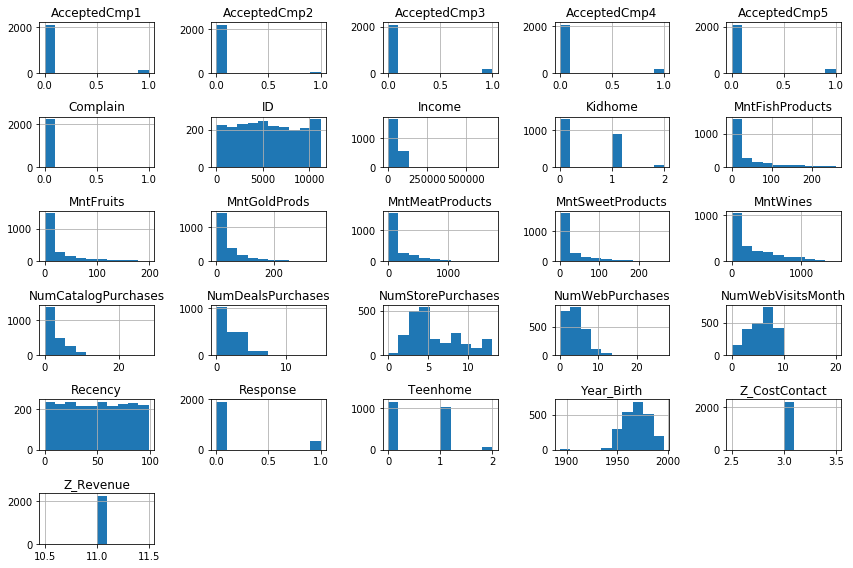

In [7]:
# Distribuição dos atributos do dataset
df_full.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

## Adicionar e Tratar colunas no dataframe
- Vamos adicionar e tratar algumas colunas para nos ajudar na análise

In [8]:
# Olhando os tipos e formato dos dados
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Convertendo os tipos de algumas colunas.
df_full['Education'] = df_full['Education'].astype('category')
df_full['Marital_Status'] = df_full['Marital_Status'].astype('category')
df_full['Dt_Customer'] = pd.to_datetime(df_full['Dt_Customer'],  dayfirst=True)


In [10]:
# Obtém a data e hora atual
now = datetime.datetime.now()

#Adicionar a coluna Age no dataset
df_full['Age'] =  now.year - df_full['Year_Birth'] 

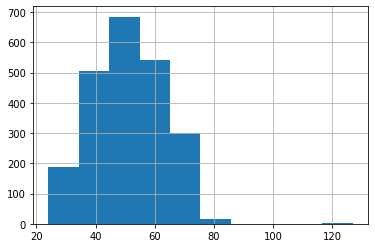

In [11]:
# Distribuição das idades
df_full['Age'].hist()

In [12]:
# Adicionar a coluna de faixas etárias
df_full['Age_Group'] = np.where(df_full.Age<30,        '20-29', 
         np.where((df_full.Age>29) & (df_full.Age<39) ,'30-39', 
         np.where((df_full.Age>39) & (df_full.Age<49) ,'40-59',          
         np.where((df_full.Age>49) & (df_full.Age<59) ,'50-59',                            
         np.where((df_full.Age>59) & (df_full.Age<69) ,'60-69',               
                                                       '>69')))))

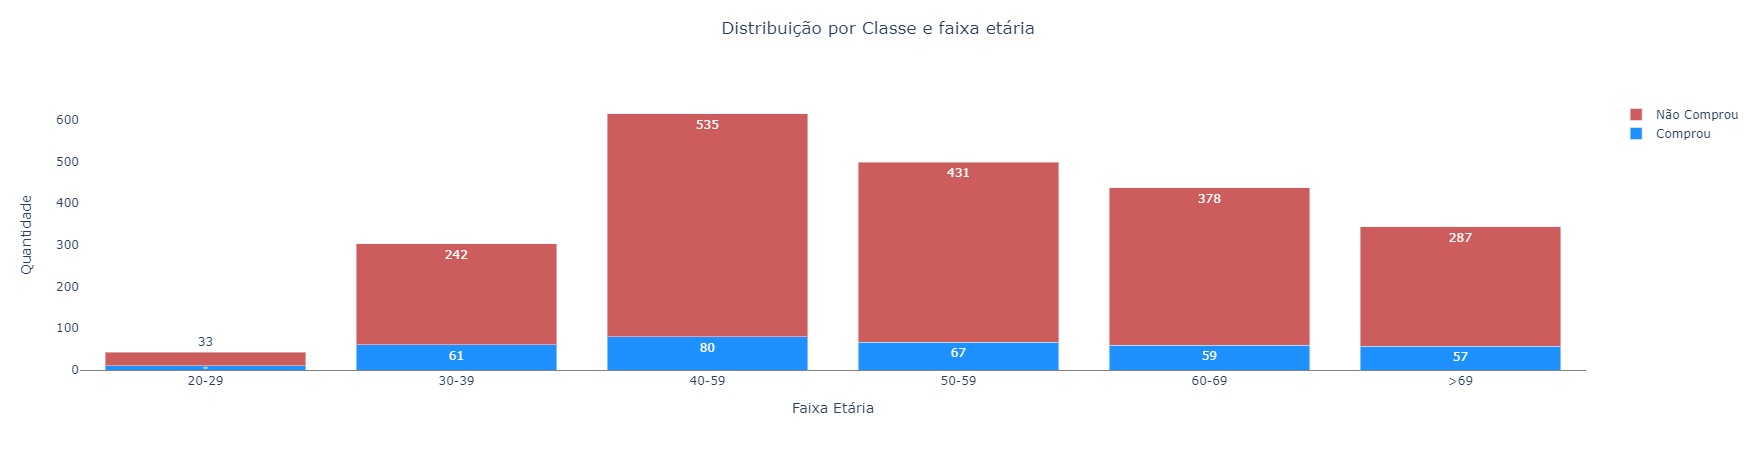

In [19]:
# Distribuição por Classe e faixa etária
df_faixa_etaria_classe = df_full.groupby(['Age_Group', 'Response'], as_index = False).agg({'ID': 'count'})

categoria= df_faixa_etaria_classe['Age_Group'].unique()
dados_classe0 = df_faixa_etaria_classe[df_faixa_etaria_classe.Response == 0]['ID']
dados_classe1 = df_faixa_etaria_classe[df_faixa_etaria_classe.Response == 1]['ID']

fig = go.Figure()


fig.add_trace( go.Bar(x=categoria, y=dados_classe1,  name='Comprou',     text=dados_classe1 , textposition = 'auto', marker_color='dodgerblue' ))
fig.add_trace( go.Bar(x=categoria, y=dados_classe0,  name='Não Comprou', text=dados_classe0 , textposition = 'auto', marker_color='indianred' ))

fig.update_layout(
    title=
    {
        'text': 'Distribuição por Classe e faixa etária',           
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
         
    }  ,
    
    plot_bgcolor='rgba(0,0,0,0)',        
    yaxis=dict(title='Quantidade'),    
    xaxis=dict(title='Faixa Etária', tickmode='linear' ,  showline=True, linewidth=1, linecolor='gray') , barmode='stack'
    
    )

fig.show()   


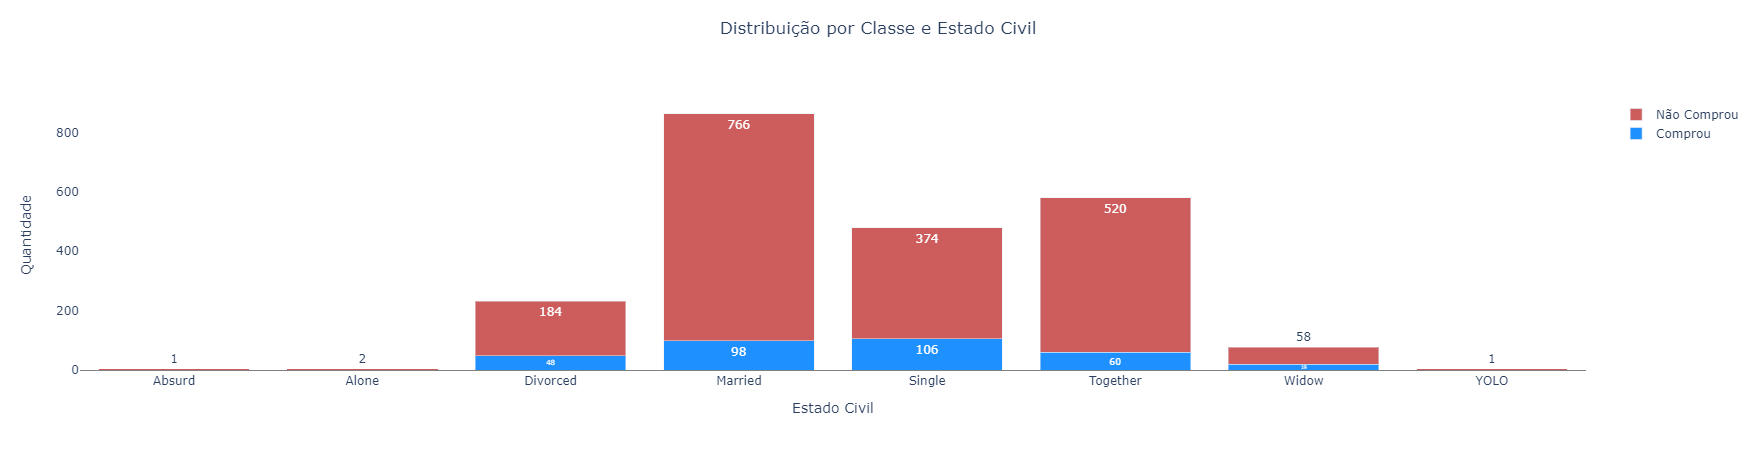

In [20]:
# Distribuição por Classe e Estado civil
df_estado_civil_classe = df_full.groupby(['Marital_Status', 'Response'], as_index = False).agg({'ID': 'count'})

categoria= df_estado_civil_classe['Marital_Status'].unique()
dados_classe0 = df_estado_civil_classe[df_estado_civil_classe.Response == 0]['ID']
dados_classe1 = df_estado_civil_classe[df_estado_civil_classe.Response == 1]['ID']

fig = go.Figure()

fig.add_trace( go.Bar(x=categoria, y=dados_classe1,  name='Comprou',     text=dados_classe1 , textposition = 'auto', marker_color='dodgerblue' ))
fig.add_trace( go.Bar(x=categoria, y=dados_classe0,  name='Não Comprou', text=dados_classe0 , textposition = 'auto', marker_color='indianred' ))

fig.update_layout(
    title=
    {
        'text': 'Distribuição por Classe e Estado Civil',           
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
         
    }  ,
    
    plot_bgcolor='rgba(0,0,0,0)',        
    yaxis=dict(title='Quantidade'),    
    xaxis=dict(title='Estado Civil', tickmode='linear' ,  showline=True, linewidth=1, linecolor='gray') , barmode='stack'
    
    )

fig.show()   


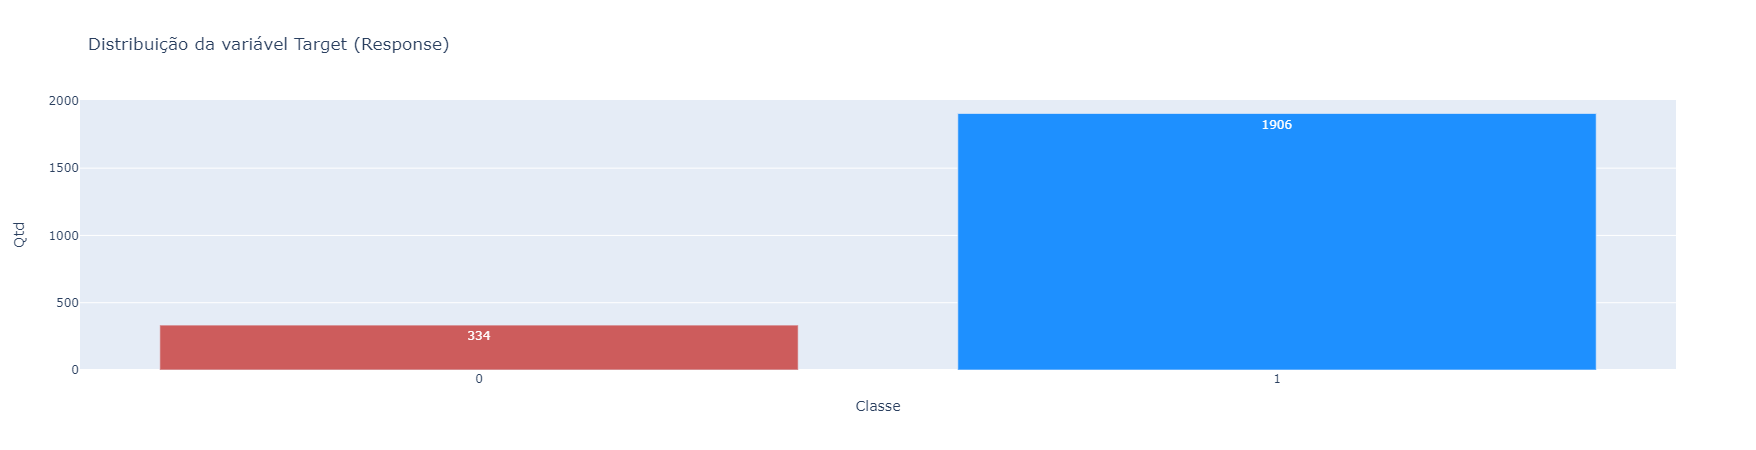

In [15]:
# Distribuição da varcountel Target

label= df_full['Response'].unique()
dados = df_full['Response'].value_counts()

trace = go.Bar(
            x =label,
            y =dados,
            textposition = 'auto',
            text=dados, 
            marker=dict(color=['dodgerblue', 'indianred', 'limegreen', 'orange' ]),              
            )

data = [trace]
layout = go.Layout(yaxis=dict(title='Qtd'),xaxis=dict(title='Classe', tickmode='linear'),title='Distribuição da variável Target (Response)')
fig = go.Figure(data=data, layout=layout, )
fig.show()    

In [16]:
# Comparando os Atributos com o Atributo target CLASS
df1 = pd.crosstab(df_car.BUYING, df_car.CLASS) 
df2 = pd.crosstab(df_car.MAINT, df_car.CLASS) 
df3 = pd.crosstab(df_car.DOORS, df_car.CLASS) 
df4 = pd.crosstab(df_car.PERSONS, df_car.CLASS) 
df5 = pd.crosstab(df_car.LUG_BOOT, df_car.CLASS) 

NameError: name 'df_car' is not defined

In [ ]:
from IPython.display import display_html

# Define a função para exibir os dataframes lado a lado.
def display_daframes(lista_dataframes, nomes=[]):
    html_str = ''
    if nomes:
        html_str += ('<tr>' +  ''.join(f'<td style="text-align:center"><span style=" font-weight: bold">{name}</span></td>' for name in nomes) +   '</tr>')
    
    html_str += ('<tr>' +  ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>'    for df in lista_dataframes) +  '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    
    display_html(html_str, raw=True)

In [ ]:
print('\tCruzameto dos Atributos previsores com o Atributo target CLASS')
display_daframes( [df1,df2,df3, df4, df5], nomes=['BUYING x Class', 'MAINT x Class', 'DOORS x Class', ' PERSONS x Class', 'LUG_BOOT x Class'])

In [ ]:
# Criando um dataframe Transformando os valores categóricos em valores inteiros
df_car_corr = pd.DataFrame()
df_car_corr['BUYING'] = df_car['BUYING'].cat.codes
df_car_corr['MAINT'] = df_car['MAINT'].cat.codes
df_car_corr['DOORS'] = df_car['DOORS'].cat.codes
df_car_corr['PERSONS'] = df_car['PERSONS'].cat.codes
df_car_corr['LUG_BOOT'] = df_car['LUG_BOOT'].cat.codes
df_car_corr['SAFETY'] = df_car['SAFETY'].cat.codes
df_car_corr['CLASS'] = df_car['CLASS'].cat.codes

In [ ]:
# Distribuição dos atributos dos dataset
df_car_corr.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

# Verificando a correlação dos Dados

In [ ]:
# Plota o gráfico de correlação dos dados.
plt.figure(figsize=(8,6))
ax1 = sns.heatmap(df_car_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, annot=True, fmt='.4f', annot_kws={"size": 9})
plt.title('Correlação dos dados\n')
plt.show()

# Preparando os dados para criação do Modelo de Previsão

In [ ]:
# Dividindo os atributos do dataframe 

# Previsores
X = df_car.iloc[:, 0:6].values

# Target
y = df_car.iloc[:,6].values.astype('str')

In [ ]:
print('Shape dos dados de X e y')
print(X.shape)
print(y.shape)

In [ ]:
# Transforma os valores categóricos em valores inteiros
from sklearn.preprocessing import LabelEncoder
x_label_encoder = LabelEncoder()
y_label_encoder  = LabelEncoder()

# Valores de X (previsores). Altera o Shape dos dados de X.
X_le = x_label_encoder.fit_transform(X.ravel())

# Valores de Y (alvo)
y_le = y_label_encoder.fit_transform(y)

In [ ]:
y_le.shape

In [ ]:
X_le.shape

In [ ]:
# Alterando o Shape do array pra ficar igual ao original, após a condificação.
X_le = X_le.reshape(X.shape)
X_le.shape

In [ ]:
# Gerando vetores binários para cada valor inteiro
from sklearn.preprocessing import OneHotEncoder

x_oneHot = OneHotEncoder(categories='auto')

In [ ]:
# Codificando os valores de X em vetores binários
X_oh = x_oneHot.fit_transform(X_le.reshape(X.shape)).toarray()
X_oh

In [ ]:
# Fazendo a Padronização dos dados
from sklearn.preprocessing import StandardScaler

#Padroniza os dados de X
scale_x = StandardScaler()
X_p = scale_x.fit_transform(X_oh.astype(float))

In [ ]:
X_p.shape

In [ ]:
X_p

# Testando Alguns Modelos de Machine Learning

In [ ]:
# Importando as bibliotecas dos modelos
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost

In [ ]:
# Defindo os parâmetos do FOLD
qtd_instancias = len(X_p)
qtd_folds = 23
seed = 7

# Criando a lista de modelos para avaliação.
modelos = []
modelos.append(('AdaBoostClassifier', AdaBoostClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=10)))
modelos.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=10)))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('LogisticRegression', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)))
modelos.append(('SVC', SVC()))
modelos.append(('xgboost', xgboost.XGBClassifier()))

In [ ]:
# Definindo as listas para análise dos resultados.
resultados = []
nomes_modelos = []
tempo_treinamento_modelos = []

# Treina os Modelos
for nome_modelo, modelo in modelos:
    kfold = model_selection.KFold(n_splits=qtd_folds, random_state=seed)
    #print(nome_modelo)
    #Define o tempo de inicio do Treinamento
    inicio = datetime.now()

    resultados_cros_val = model_selection.cross_val_score(modelo, X_p, y_le.ravel(), cv=kfold, scoring='accuracy')
    
    #Define o tempo final do Treinamento
    fim = datetime.now()   
    tempo_modelo = (fim - inicio).total_seconds()
    tempo_treinamento_modelos.append( tempo_modelo)
    
    resultados.append(resultados_cros_val)   
    nomes_modelos.append(nome_modelo)        
    
    print("\n%s: Acurácia: %.4f (Desvio Padrão: %.4f)"  % (nome_modelo, resultados_cros_val.mean(), resultados_cros_val.std()) )
    print('Tempo de Treinamento: %s segundos' % tempo_modelo )    

In [ ]:
#Plota um gráfico de Comparação dos Algoritmos de Classificação

# Prepara os dados do Plot
resul_AdaBoostClassifier = resultados[0]
resul_GradientBoostingClassifier = resultados[1]
resul_RandomForestClassifier = resultados[2]
resul_ExtraTreesClassifier = resultados[3]
resul_DecisionTreeClassifier = resultados[4]
resul_KNeighborsClassifier = resultados[5]
resul_GaussianNB = resultados[6]
resul_LogisticRegression = resultados[7]
#resul_LogisticRegressionCV = resultados[8]
resul_SVC = resultados[8]
resul_xgboost = resultados[9]

# Configura o Plot.
trace0= go.Box(y=resul_AdaBoostClassifier , name = 'AdaBoostClassifier ')
trace1= go.Box(y=resul_GradientBoostingClassifier , name = 'GradientBoostingClassifier ')
trace2= go.Box(y=resul_RandomForestClassifier , name = 'RandomForestClassifier ')
trace3= go.Box(y=resul_ExtraTreesClassifier , name = 'ExtraTreesClassifier ')
trace4= go.Box(y=resul_DecisionTreeClassifier , name = 'DecisionTreeClassifier ')
trace5= go.Box(y=resul_KNeighborsClassifier , name = 'KNeighborsClassifier ')
trace6= go.Box(y=resul_GaussianNB , name = 'GaussianNB ')
trace7= go.Box(y=resul_LogisticRegression , name = 'LogisticRegression ')
trace8= go.Box(y=resul_SVC , name = 'SVC ')
trace9= go.Box(y=resul_xgboost , name = 'xgboost', )

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

layout = go.Layout(yaxis=dict(title='acurácia') ,title='Comparação dos Algoritmos de Classificação', showlegend=False)
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )

In [ ]:
#Plota um gráfico de Comparação dos Tempo de treinamentodos Algoritmos de Classificação
cores = ['rgb(31, 119, 180)',
 'rgb(255, 127, 14)',
 'rgb(44, 160, 44)',
 'rgb(214, 39, 40)',
 'rgb(148, 103, 189)',
 'rgb(140, 86, 75)',
 'rgb(227, 119, 194)',
 'rgb(127, 127, 127)',
 'rgb(188, 189, 34)',
 'rgb(23, 190, 207)']

trace0= go.Bar(y=tempo_treinamento_modelos, x=nomes_modelos, textposition = 'auto', text=tempo_treinamento_modelos,  marker=dict(color=cores),opacity=0.7  )
data=[trace0]

layout = go.Layout(yaxis=dict(title='segundos') ,title='Tempo para treinamento dos Algoritmos de Classificação')
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )


# Escolhendo um Modelo de Previsão

In [ ]:
# O algoritmo de classificação que obteve o melhor resultado, apesar do maior tempo para treinamento, foi o GradientBoostingClassifier. Vamos selecionar ele.
# Criando o Modelo
classificador = GradientBoostingClassifier(n_estimators=200)

In [ ]:
# Separando os dados de Treinamento e Teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_p, y_le, test_size = 0.3)

In [ ]:
print('Shape dos dados de Treinamento')
print(X_treinamento.shape)
print(y_treinamento.shape)

In [ ]:
print('Shape dos dados de Teste')
print(X_teste.shape)
print(y_teste.shape)

In [ ]:
# Treinando o modelo selecionado
classificador.fit(X_treinamento, y_treinamento);

In [ ]:
# Realiza a previsão com os dados de Teste
y_previsto = classificador.predict(X_teste)

In [ ]:
# Identificando o nome da classe de acordo com a codificação
#acc = 0  #good = 1 #unacc = 2 #vgood = 3
nome_classe = ['acc', 'good', 'unacc', 'vgood']

In [ ]:
# Relatório de Classificação
#precision -  daqueles que classifiquei como corretos, quantos efetivamente estavam corretos? 
#recall    -  quando realmente é da classe XPTO, o quão frequente você classifica como XPTO?
#f1-score  -  balanço entre a precisão e o recall. Combina precisão e recall em um número único que indique a qualidade geral do seu modelo (quanto maior melhor o modelo).
#support   -  número de ocorrência de cada classe.

from sklearn.metrics import classification_report
relatorio_classificacao = classification_report(y_teste, y_previsto, target_names=nome_classe ,digits=4)

# Imprimindo o relatório
print('\tRelatório de Classificação do modelo')
print(relatorio_classificacao)

In [ ]:
# Visualizar a Matriz de confusão (confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_previsto) 

df_cm = pd.DataFrame(cm, nome_classe,  nome_classe)

print('Obs.: Nas linhas temos as Classes reais e nas colunas as Classes previstas.\n')
print('\tMatriz de Confusão')
df_cm

# Exibindo os dados de Teste após a Previsão

In [ ]:
# Reverte a alteração da escala feita anteriormente
X_teste_scale = scale_x.inverse_transform(X_teste)
X_teste_scale.shape

In [ ]:
# Reverte a alteração do onehot feita anteriormente
X_teste_oh = x_oneHot.inverse_transform(X_teste_scale)
X_teste_oh.shape

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
X_teste_le = x_label_encoder.inverse_transform(X_teste_oh.ravel())
X_teste_le.shape

In [ ]:
X_teste_le = X_teste_le.reshape(X_teste_oh.shape)
X_teste_le.shape

In [ ]:
df_previsores = pd.DataFrame(X_teste_le, columns=['BUYING', 'MAINT', 'DOORS', 'PERSONS' , 'LUG_BOOT', 'SAFETY'])
#df_previsores.head()

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_previsto_it = y_label_encoder.inverse_transform(y_previsto.ravel())

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_teste_it = y_label_encoder.inverse_transform(y_teste.ravel())

In [ ]:
# Dataframe com a classe Real
df_prev = pd.DataFrame(y_previsto_it, columns=['CLASSE_PREVISTA'])

# Dataframe com a classe Prevista
df_real = pd.DataFrame(y_teste_it, columns=['CLASSE_REAL'])

# Juntando os dois dataframes
df_target = pd.merge(df_real, df_prev, right_index=True, left_index=True)
df_target['CLASSE_PREVISTA_CORRETAMENTE'] = df_target.CLASSE_PREVISTA == df_target.CLASSE_REAL


In [ ]:
# Agora juntando os dataframes de previsores e target
df_merge = pd.merge(df_previsores, df_target, right_index=True, left_index=True)

In [ ]:
# Exibindo somente os registros onde houve erro na previsão da classe.
df_merge[df_merge.CLASSE_PREVISTA_CORRETAMENTE==False]

In [ ]:
# Exibindo a quantidade.
df_merge.groupby(['CLASSE_PREVISTA_CORRETAMENTE']).count()